<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S13/YoloV3(MetalCanDetector).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Motivation**:
 Waste Segregator Robo which seperates Recyclable & Non-Recyclable Waste Materials and dumps them into resp bins.

**Number of Classes**: 1

**[*Metal Can*]**

# ***Steps to Follow:***






**1. Clone the Github Repo**

In [1]:
!git clone https://github.com/Gilf641/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 3247, done.
remote: Total 3247 (delta 0), reused 0 (delta 0), pack-reused 3247
Receiving objects: 100% (3247/3247), 31.82 MiB | 4.85 MiB/s, done.
Resolving deltas: 100% (109/109), done.


**2. Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**3. Display Framework & Device Properties**

In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [4]:
ls

gdrive/  sample_data/  YoloV3/


**4. Change current working directory to YoloV3/**

In [5]:
cd YoloV3/

/content/YoloV3


In [6]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


**5. Add Weights Folder and paste YoloV3 Weights**

In [7]:
! mkdir weights 
!cd weights/

In [8]:

! wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-04 16:12:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights        0%[                    ]   1.87M   799KB/s               ^C


**6. Train YoloV3 on smalcoco**

In [9]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 5 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=5, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-07-04 16:14:29.759229: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activatio

**7. Train YoloV3 on Custom Dataset(WasteMaterials in my case)**

In [ ]:
! cp -R "/content/YoloV3/weights/last.pt"  "/content/gdrive/My Drive/YoloWeights"

In [14]:
!python train.py --data data/customdata/custom.data --batch 12 --cache --cfg cfg/yolov3-custom.cfg --epochs 160 --cache-images 

Namespace(accumulate=4, adam=False, batch_size=12, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=160, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-07-04 16:22:27.045333: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=2
pad=1
ac

**8. Test the model & Save all the results in out_out/**

In [15]:
!python detect.py --conf-thres 0.5 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.5, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky
from=-3
activation=linear
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky
bat

In [16]:
!python detect.py --conf-thres 0.1 --output out_out --fourcc out_out/

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='out_out/', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky
from=-3
activation=linear
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

# ***Test Results***

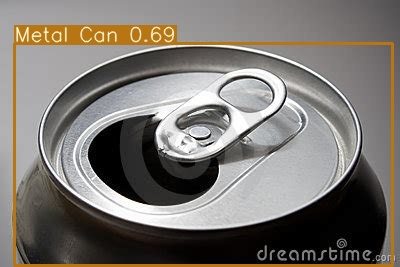

In [19]:
Image(filename='out_out/metal423.jpg', width=600)

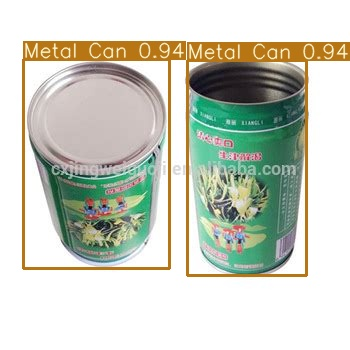

In [20]:
Image(filename='out_out/metal425.jpg', width=600)

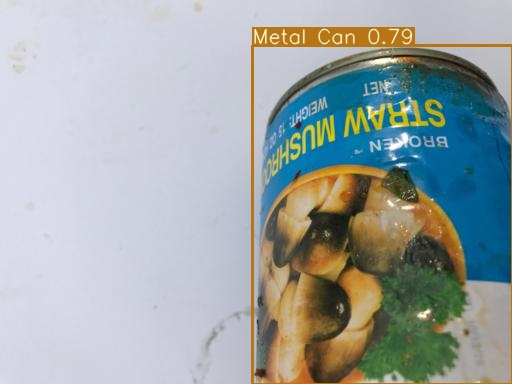

In [21]:
Image(filename='out_out/metal13.jpg', width=600)

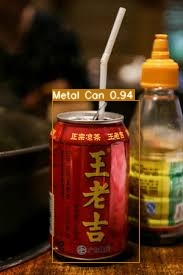

In [22]:
Image(filename='out_out/metal435.jpg', width=600)

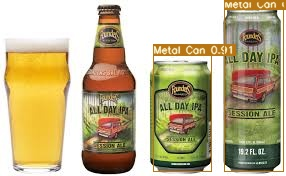

In [23]:
Image(filename='out_out/metal436.jpg', width=600)

In [ ]:
! cd YoloV3/
!ls

/bin/bash: line 0: cd: YoloV3/: No such file or directory
 annotation_tool   out_out	  results.txt	     train.py
 cfg		   output	  runs		    'ubdivisions=1'
 data		   __pycache__	  test_batch0.png    utils
 detect.py	   README.md	  test.py	     vim.exe.stackdump
 last.pt	   results.json   ting		     weights
 models.py	   results.png	  train_batch0.png


**Use this command to move model**

In [ ]:
# !mv "/content/YoloV3/last.pt" "/content/YoloV3/weights/"

In [28]:
!cp -R "/content/YoloV3/weights/"  "/content/gdrive/My Drive/YoloWeights (1)"

In [ ]:
# ! cd YoloV3
# ! mkdir Video
# ! cp -R "/content/gdrive/My Drive/data/0070-0350.mp4" "/content/YoloV3/Video"

/bin/bash: line 0: cd: YoloV3: No such file or directory


# Video Sample 1

In [29]:
# !mkdir vidOutput
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/vidOutput/" --source "/content/gdrive/My Drive/Videos/The Australian Big Rig Roadshow Beer Can promo.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/yolo_v3/vidOutput/', save_txt=False, source='/content/gdrive/My Drive/Videos/The Australian Big Rig Roadshow Beer Can promo.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky
fr

#Video Sample 2

In [30]:

!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/vidOutput/" --source "/content/gdrive/My Drive/Videos/The_SECRET_of_Aluminum_Beer_Cans._HIDDEN_Plastic_Cover_Inside_!(360p)[1].mp4"

Streaming output truncated to the last 5000 lines.
video 1/1 (1341/6337) /content/gdrive/My Drive/Videos/The_SECRET_of_Aluminum_Beer_Cans._HIDDEN_Plastic_Cover_Inside_!(360p)[1].mp4: 320x512 Done. (0.019s)
video 1/1 (1342/6337) /content/gdrive/My Drive/Videos/The_SECRET_of_Aluminum_Beer_Cans._HIDDEN_Plastic_Cover_Inside_!(360p)[1].mp4: 320x512 Done. (0.020s)
video 1/1 (1343/6337) /content/gdrive/My Drive/Videos/The_SECRET_of_Aluminum_Beer_Cans._HIDDEN_Plastic_Cover_Inside_!(360p)[1].mp4: 320x512 Done. (0.020s)
video 1/1 (1344/6337) /content/gdrive/My Drive/Videos/The_SECRET_of_Aluminum_Beer_Cans._HIDDEN_Plastic_Cover_Inside_!(360p)[1].mp4: 320x512 Done. (0.020s)
video 1/1 (1345/6337) /content/gdrive/My Drive/Videos/The_SECRET_of_Aluminum_Beer_Cans._HIDDEN_Plastic_Cover_Inside_!(360p)[1].mp4: 320x512 Done. (0.019s)
video 1/1 (1346/6337) /content/gdrive/My Drive/Videos/The_SECRET_of_Aluminum_Beer_Cans._HIDDEN_Plastic_Cover_Inside_!(360p)[1].mp4: 320x512 Done. (0.018s)
video 1/1 (1347/633

#Video Sample 3

In [31]:

!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/vidOutput/" --source "/content/gdrive/My Drive/Videos/_the_[1].mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/yolo_v3/vidOutput/', save_txt=False, source='/content/gdrive/My Drive/Videos/_the_[1].mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky
from=-3
activation=linear
batch_normaliz